In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serial
import datetime

In [89]:
acq_adapt = np.load("imgs/im_adapted_g6.npz")
s_a = acq_adapt["signal"]
f = acq_adapt["f"]
t_a = acq_adapt["t"]
acq_naive = np.load("imgs/im_direct_g6.npz")
s_n = acq_naive["signal"]
t_n = acq_naive["t"]

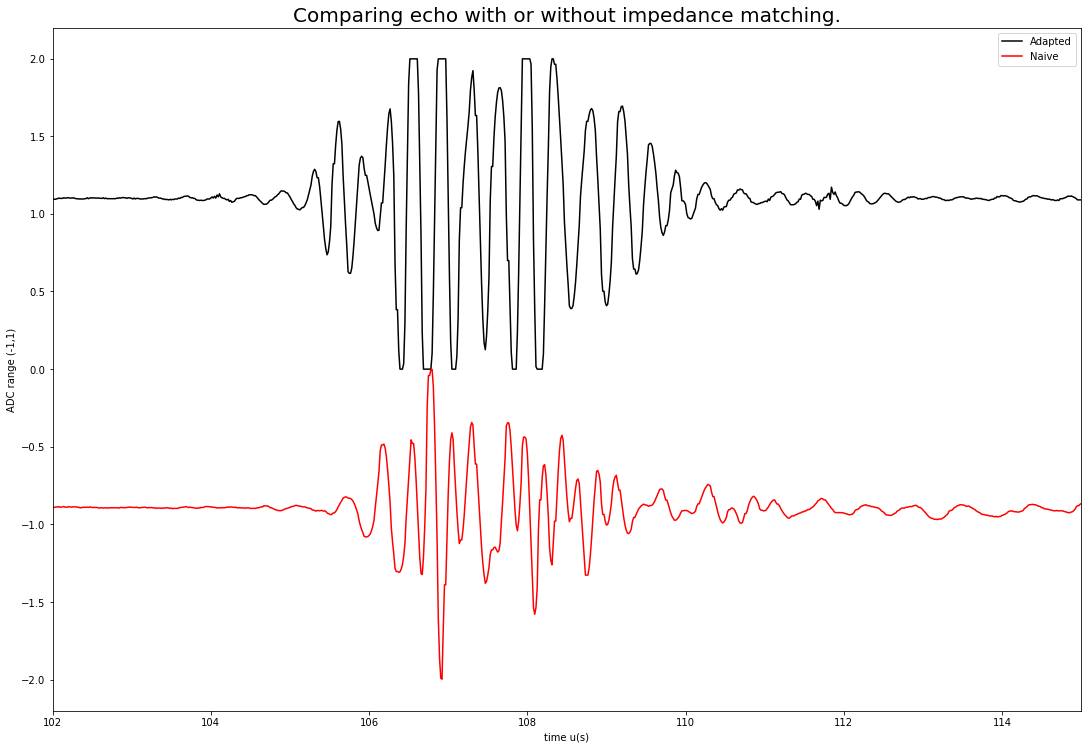

In [99]:
plt.figure(figsize=(15,10))
plt.plot(t_a,s_a+1,label="Adapted",color="black")
plt.plot(t_n+2,s_n-1,label="Naive",color="red")
plt.legend()
plt.tight_layout(pad=1)
plt.xlim(102,115)
plt.xlabel('time u(s)')
plt.ylabel('ADC range (-1,1)')
plt.title("Comparing echo with or without impedance matching.", fontsize=20)
plt.savefig("2.IM_details.jpg")

# Spectrum

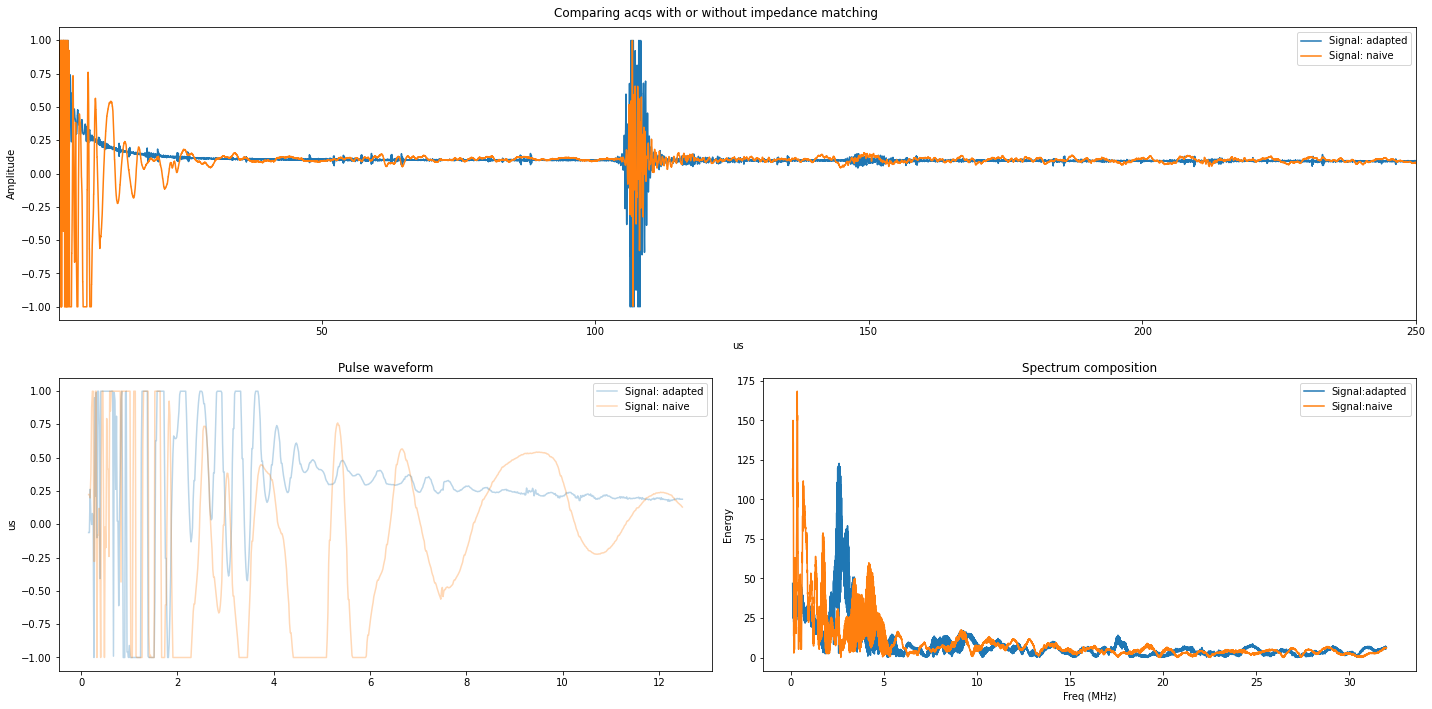

In [98]:
plt.figure(figsize=(20,10))

SIGS = [s_a,s_n]
names = ["adapted","naive"]
t = t_n
m = 800
for k in range(2):
    signal = SIGS[k]
    FFT = np.abs(np.fft.fft(signal))


    plt.subplot(2, 1, 1)
    if k == 1:
        offset = 2
    else:
        offset = 0
    plt.plot(t[10:]+offset,signal[10:],label="Signal: "+names[k])
    plt.xlabel("us")
    plt.ylabel("Amplitude")
    plt.xlim(2,250)
    plt.legend()
    title = "Comparing acqs with or without impedance matching"

    plt.subplot(2, 2, 3)
    plt.plot(t[10:m],signal[10:m],alpha=0.3,label="Signal: "+names[k])
    plt.title('Pulse waveform')
    plt.ylabel('V')
    plt.ylabel('us')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.title('Spectrum composition')
    plt.plot(f[25:len(FFT)//2],FFT[25:len(FFT)//2],label="Signal:"+names[k])
    plt.xlabel('Freq (MHz)')
    plt.ylabel('Energy')
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()
plt.savefig("2.IM_compare.jpg")